## 이커머스 데이터 분석 (반품 및 이탈 상관 분석, 시장 트렌드 분석, RFM 고객 세분화 분석)

### 1. 반품 및 이탈 상관 분석

#### Returns(반품) 상관 분석

* **Data Import**

In [1]:
import pandas as pd
csv_file_path = '/Users/kimsumin/Downloads/Data/Cleaning_Data.csv'
df = pd.read_csv(csv_file_path, sep=";",encoding='utf-8')
df

,Customer ID,Gender,Age,Age Labels,Year,Month,Day,Hour,Season,Time,DOW,WOW,Product Category,Payment Method,Sales,Returns,Churn
0,46251,Male,37,35-44,2020,9,8,9,Fall,Morning,Tuesday,Weekdays,Electronics,Credit Card,36,0.0,0
1,46251,Male,37,35-44,2022,3,5,12,Spring,Afternoon,Saturday,Weekends,Home,PayPal,1872,0.0,0
2,46251,Male,37,35-44,2022,5,23,18,Spring,Evening,Monday,Weekdays,Home,PayPal,576,0.0,0
3,46251,Male,37,35-44,2020,11,12,13,Fall,Afternoon,Thursday,Weekdays,Clothing,PayPal,196,0.0,0
4,13593,Female,49,45-54,2020,11,27,17,Fall,Afternoon,Friday,Weekdays,Home,Credit Card,449,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405017,39806,Female,60,55-64,2021,8,1,4,Summer,Night,Sunday,Weekends,Electronics,Credit Card,1125,0.0,0
405018,33807,Male,63,55-64,2023,1,24,12,Winter,Afternoon,Tuesday,Weekdays,Home,Cash,436,0.0,0
405019,20455,Female,66,65+,2021,6,4,5,Summer,Morning,Friday,Weekdays,Electronics,Credit Card,233,1.0,0
405020,15023,Male,64,55-64,2021,6,27,14,Summer,Afternoon,Sunday,Weekends,Electronics,Cash,88,1.0,0


* **연속형 데이터 상관 분석(Age, Year, Month, Day, Hour, Sales, Churn) <-> Returns**

/var/folders/50/hmzhw8y94w90mbcy61nlrdl00000gn/T/ipykernel_41377/1253841160.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(np.ones_like(df.drop(columns='Customer ID').corr(), dtype=bool))
/var/folders/50/hmzhw8y94w90mbcy61nlrdl00000gn/T/ipykernel_41377/1253841160.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(df.drop(columns='Customer ID').corr(),3), linewidths=0.1, vmax=1.0, vmin=-1.0,


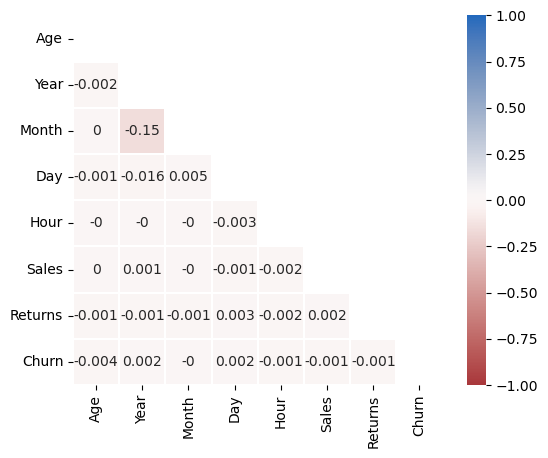

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 상관계수 히트맵 시각화
colormap = 'vlag_r'
mask = np.triu(np.ones_like(df.drop(columns='Customer ID').corr(), dtype=bool))
sns.heatmap(round(df.drop(columns='Customer ID').corr(),3), linewidths=0.1, vmax=1.0, vmin=-1.0,
            square=True, mask=mask, annot=True, cmap=colormap, linecolor='white')
plt.show()

<font color=firebrick>**연속형 변수들과 반품 및 이탈 상관계수 확인 결과 연관성이 없음**</font>

* **Point-Biserial 상관계수 분석(연속형 데이터와 이진 범주형 데이터 간의 상관관계 분석시 유용)**

In [3]:
from scipy.stats import pointbiserialr

# 'Returns'와 여러 개의 범주형 변수 선택
binary_response_variable = "Returns"
categorical_variables = ["Age", "Year", "Month", "Day", "Hour", "Sales"]

# Point-Biserial 상관계수 계산
biserial_correlations = {}
for column in categorical_variables:
    biserial_corr_coeff, p_value = pointbiserialr(df[column], df[binary_response_variable])
    biserial_correlations[column] = (round(biserial_corr_coeff,3), round(p_value,3))

# 결과 출력
for column, (correlation_coeff, p_value) in biserial_correlations.items():
    print(f"Point-Biserial correlation between {column} and {binary_response_variable}: {correlation_coeff}")
    print(f"P-value: {p_value}\n")

Point-Biserial correlation between Age and Returns: -0.001
P-value: 0.519

Point-Biserial correlation between Year and Returns: -0.001
P-value: 0.524

Point-Biserial correlation between Month and Returns: -0.001
P-value: 0.414

Point-Biserial correlation between Day and Returns: 0.003
P-value: 0.081

Point-Biserial correlation between Hour and Returns: -0.002
P-value: 0.285

Point-Biserial correlation between Sales and Returns: 0.002
P-value: 0.158



<font color=firebrick>**연속형 변수와 Returns(반품)변수 간에 연관성이 없음**</font><br><br><br><br>

* **범주형 데이터 상관 분석(Gender, Age Labels, Season, Time, DOW, WOW, Product Category, Payment Method) <-> Returns**
* **카이제곱 검정**
* **Cramer's V 검정**

**카이제곱 검정 결과 해석 방법**
1. **Chi-square statistic (검정 통계량):**
    * **검정 통계량이 클수록 두 변수 간에 관련이 있을 가능성이 높습니다.**
    * **작은 값은 두 변수 간의 독립성을 나타낼 가능성이 높습니다.**
2. **P-value (유의확률):**
    * **유의확률이 작을수록 두 변수 간에는 통계적으로 유의미한 관계가 있을 가능성이 높습니다.**
    * **통상적으로 0.05 이하의 유의수준을 사용합니다.**

In [4]:
from scipy.stats import chi2_contingency

# 범주형 변수와 이진 변수 선택
categorical_columns = ["Gender", "Age Labels", "Season", "Time", "DOW", "WOW", "Product Category", "Payment Method","Churn"]
binary_response_variable = "Returns"

for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df[binary_response_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test between {column} and {binary_response_variable}:")
    print(f"Chi2 value: {round(chi2,3)}, P-value: {round(p,3)}\n")

Chi-square test between Gender and Returns:
Chi2 value: 1.912, P-value: 0.167

Chi-square test between Age Labels and Returns:
Chi2 value: 4.498, P-value: 0.48

Chi-square test between Season and Returns:
Chi2 value: 2.63, P-value: 0.452

Chi-square test between Time and Returns:
Chi2 value: 2.614, P-value: 0.455

Chi-square test between DOW and Returns:
Chi2 value: 5.328, P-value: 0.503

Chi-square test between WOW and Returns:
Chi2 value: 0.121, P-value: 0.728

Chi-square test between Product Category and Returns:
Chi2 value: 4.154, P-value: 0.245

Chi-square test between Payment Method and Returns:
Chi2 value: 7.496, P-value: 0.058

Chi-square test between Churn and Returns:
Chi2 value: 0.491, P-value: 0.483



<font color=firebrick>**모든 컬럼이 P-value가 0.05보다 크므로 Returns(반품)과 유의미한 관계가 없다고 해석 가능.**</font><br><br><br><br>

**Cramer's V 상관계수 검정**

In [5]:
# 범주형 변수와 이진 변수 선택
categorical_variables = ["Gender", "Age Labels", "Season", "Time", "DOW", "WOW", "Product Category", "Payment Method","Churn"]
binary_response_variable = "Returns"

# Cramer's V 상관계수 검정 함수
def cramers_v_test(df, variable1, variable2):
    # 교차표 생성
    contingency_table = pd.crosstab(df[variable1], df[variable2])

    # 카이제곱 통계량, p-value, 자유도, 기대 빈도 행렬 계산
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Cramer's V 계산
    n = contingency_table.sum().sum()  # 전체 샘플 수
    min_dim = min(contingency_table.shape)  # 교차표의 최소 차원
    cramers_v = np.sqrt(chi2 / (n * (min_dim - 1)))

    return chi2, p, cramers_v

# 각 변수와 'Returns' 간의 Cramer's V 상관계수 검정 실행
for column in categorical_variables:
    chi2_stat, p_val, cramers_v = cramers_v_test(df, binary_response_variable, column)
    print(f"Cramer's V correlation between {column} and {binary_response_variable}: {round(cramers_v,3)}")
    print(f"P-value: {round(p_val,3)}\n")

Cramer's V correlation between Gender and Returns: 0.002
P-value: 0.167

Cramer's V correlation between Age Labels and Returns: 0.003
P-value: 0.48

Cramer's V correlation between Season and Returns: 0.003
P-value: 0.452

Cramer's V correlation between Time and Returns: 0.003
P-value: 0.455

Cramer's V correlation between DOW and Returns: 0.004
P-value: 0.503

Cramer's V correlation between WOW and Returns: 0.001
P-value: 0.728

Cramer's V correlation between Product Category and Returns: 0.003
P-value: 0.245

Cramer's V correlation between Payment Method and Returns: 0.004
P-value: 0.058

Cramer's V correlation between Churn and Returns: 0.001
P-value: 0.483



<font color=firebrick>**모든 컬럼이 P-value가 0.05보다 크므로 Returns(반품)과 유의미한 관계가 없다고 해석 가능.**</font><br><br><br><br>

**Churn(이탈) 상관 분석**

* **Point-Biserial 상관계수 분석(연속형 데이터와 이진 범주형 데이터 간의 상관관계 분석시 유용)**

In [6]:
from scipy.stats import pointbiserialr

# 'Returns'와 여러 개의 범주형 변수 선택
binary_response_variable = "Churn"
categorical_variables = ["Age", "Year", "Month", "Day", "Hour", "Sales", "Returns"]

# Point-Biserial 상관계수 계산
biserial_correlations = {}
for column in categorical_variables:
    biserial_corr_coeff, p_value = pointbiserialr(df[column], df[binary_response_variable])
    biserial_correlations[column] = (round(biserial_corr_coeff,3), round(p_value,3))

# 결과 출력
for column, (correlation_coeff, p_value) in biserial_correlations.items():
    print(f"Point-Biserial correlation between {column} and {binary_response_variable}: {correlation_coeff}")
    print(f"P-value: {p_value}\n")

Point-Biserial correlation between Age and Churn: -0.004
P-value: 0.006

Point-Biserial correlation between Year and Churn: 0.002
P-value: 0.314

Point-Biserial correlation between Month and Churn: -0.0
P-value: 0.937

Point-Biserial correlation between Day and Churn: 0.002
P-value: 0.232

Point-Biserial correlation between Hour and Churn: -0.001
P-value: 0.572

Point-Biserial correlation between Sales and Churn: -0.001
P-value: 0.623

Point-Biserial correlation between Returns and Churn: -0.001
P-value: 0.481



<font color=firebrick>**모든 컬럼이 이탈과 유의미한 상관관계가 없다고 해석 가능.**</font><br><br><br><br>

* **범주형 데이터 상관 분석(Gender, Age Labels, Season, Time, DOW, WOW, Product Category, Payment Method) <-> Churn**
* **카이제곱 검정**
* **Cramer's V 검정**

**카이제곱 검정 결과 해석 방법**
1. **Chi-square statistic (검정 통계량):**
    * **검정 통계량이 클수록 두 변수 간에 관련이 있을 가능성이 높습니다.**
    * **작은 값은 두 변수 간의 독립성을 나타낼 가능성이 높습니다.**
2. **P-value (유의확률):**
    * **유의확률이 작을수록 두 변수 간에는 통계적으로 유의미한 관계가 있을 가능성이 높습니다.**
    * **통상적으로 0.05 이하의 유의수준을 사용합니다.**

In [7]:
from scipy.stats import chi2_contingency

# 범주형 변수와 이진 변수 선택
categorical_columns = ["Gender", "Age Labels", "Season", "Time", "DOW", "WOW", "Product Category", "Payment Method", "Returns"]
binary_response_variable = "Churn"

for column in categorical_columns:
    contingency_table = pd.crosstab(df[column], df[binary_response_variable])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square test between {column} and {binary_response_variable}:")
    print(f"Chi2 value: {round(chi2,3)}, P-value: {round(p,3)}\n")

Chi-square test between Gender and Churn:
Chi2 value: 4.386, P-value: 0.036

Chi-square test between Age Labels and Churn:
Chi2 value: 53.512, P-value: 0.0

Chi-square test between Season and Churn:
Chi2 value: 3.612, P-value: 0.307

Chi-square test between Time and Churn:
Chi2 value: 0.497, P-value: 0.92

Chi-square test between DOW and Churn:
Chi2 value: 9.315, P-value: 0.157

Chi-square test between WOW and Churn:
Chi2 value: 0.399, P-value: 0.528

Chi-square test between Product Category and Churn:
Chi2 value: 0.313, P-value: 0.957

Chi-square test between Payment Method and Churn:
Chi2 value: 5.394, P-value: 0.145

Chi-square test between Returns and Churn:
Chi2 value: 0.491, P-value: 0.483



귀무가설 (H0): Gender와 Churn은 서로 독립적이다. (즉, 두 변수 간에 유의미한 관계가 없다.)<br>
대립가설 (H1): Gender와 Churn은 서로 독립적이지 않다. (즉, 두 변수 간에 유의미한 관계가 있다.)

**Chi2 value: 53.512**: 카이제곱 통계량은 4.386입니다. 이 값이 클수록 귀무가설을 기각하는 데 도움이 됩니다.<br>
**P-value: 0.036**: P-value는 0.036으로 표시됩니다. 이는 유의수준 0.05에서 통계적으로 유의미하다는 것을 나타냅니다.<br><br>

P-value가 0.036로 유의수준 0.05보다 작으므로, 귀무가설을 기각할 충분한 증거가 있습니다.<br>
이는 **Gender와 Churn 간에 통계적으로 유의미한 관계가 있을 가능성이 있다는 것을 나타냅니다.**<br><br>

<font color=firebrick>**따라서, 주어진 결과에 따르면, Gender와 Churn 간에는 유의미한 관계가 있을 수 있습니다.**<br><br></font>

귀무가설 (H0): Age Labels와 Churn은 서로 독립적이다. (즉, 두 변수 간에 유의미한 관계가 없다.)<br>
대립가설 (H1): Age Labels와 Churn은 서로 독립적이지 않다. (즉, 두 변수 간에 유의미한 관계가 있다.)

**Chi2 value: 53.512**: 카이제곱 통계량은 53.512입니다. 이 값이 클수록 귀무가설을 기각하는 데 도움이 됩니다.<br>
**P-value: 0.0**: P-value는 0.0으로 표시됩니다. 이는 매우 작은 값을 나타내며, 통상적으로 0.05 또는 그 이하의 유의수준에서는 귀무가설을 기각할 수 있습니다.<br><br>

따라서, 주어진 결과에 따르면, 유의수준 0.05에서 귀무가설을 기각할 충분한 증거가 있으므로 Age Labels와 Churn은 서로 독립적이지 않다고 할 수 있습니다.<br> **다시 말하면, 두 변수 간에는 통계적으로 유의미한 관계가 있을 가능성이 높습니다.**<br><br>

<font color=firebrick>**결과적으로, Age Labels와 Churn 간에는 유의미한 관계가 있다고 판단할 수 있습니다.**</font> <br><br><br><br>

**Cramer's V 상관계수 검정**

In [8]:
# 범주형 변수와 이진 변수 선택
categorical_variables = ["Gender", "Age Labels", "Season", "Time", "DOW", "WOW", "Product Category", "Payment Method","Returns"]
binary_response_variable = "Churn"

# Cramer's V 상관계수 검정 함수
def cramers_v_test(df, variable1, variable2):
    # 교차표 생성
    contingency_table = pd.crosstab(df[variable1], df[variable2])

    # 카이제곱 통계량, p-value, 자유도, 기대 빈도 행렬 계산
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Cramer's V 계산
    n = contingency_table.sum().sum()  # 전체 샘플 수
    min_dim = min(contingency_table.shape)  # 교차표의 최소 차원
    cramers_v = np.sqrt(chi2 / (n * (min_dim - 1)))

    return chi2, p, cramers_v

# 각 변수와 'Returns' 간의 Cramer's V 상관계수 검정 실행
for column in categorical_variables:
    chi2_stat, p_val, cramers_v = cramers_v_test(df, binary_response_variable, column)
    print(f"Cramer's V correlation between {column} and {binary_response_variable}: {round(cramers_v,3)}")
    print(f"P-value: {round(p_val,3)}\n")

Cramer's V correlation between Gender and Churn: 0.003
P-value: 0.036

Cramer's V correlation between Age Labels and Churn: 0.011
P-value: 0.0

Cramer's V correlation between Season and Churn: 0.003
P-value: 0.307

Cramer's V correlation between Time and Churn: 0.001
P-value: 0.92

Cramer's V correlation between DOW and Churn: 0.005
P-value: 0.157

Cramer's V correlation between WOW and Churn: 0.001
P-value: 0.528

Cramer's V correlation between Product Category and Churn: 0.001
P-value: 0.957

Cramer's V correlation between Payment Method and Churn: 0.004
P-value: 0.145

Cramer's V correlation between Returns and Churn: 0.001
P-value: 0.483



1. **Gender와 Churn 간의 Cramer's V:**
* **Cramer's V: 0.003**
    매우 작은 값으로, Gender와 Churn 간의 연관성이 매우 낮다는 것을 나타냅니다.<br>
* **P-value: 0.036**
    유의수준 0.05에서 P-value가 작은 편이지만, 여전히 상대적으로 높습니다.<br>
    <font color='firebrick'>**따라서 통계적으로 유의미한 연관성이 존재한다고는 말하기 어렵습니다.<br>
    Cramer's V 값이 매우 작기 때문에 통계적으로 유의미한 연관성이 거의 없다고 판단됩니다.**<br></font>
 
2. **Age Labels와 Churn 간의 Cramer's V:**
* **Cramer's V: 0.011**
    여전히 매우 작은 값으로, Age Labels와 Churn 간의 연관성이 매우 낮다는 것을 나타냅니다.<br>
* **P-value: 0.0**
    **P-value가 0.05보다 작으므로 <font color='firebrick'>통계적으로 유의미한 연관성이 있다고 할 수 있습니다.<br>
    하지만, Cramer's V 값이 매우 작기 때문에 연관성이 강하다고 말하기는 어렵습니다.**<br></font><br><br><br>


**Churn(이탈)에 따른 특성 분석**

In [9]:
df["Churn"].value_counts()

0    323914
1     81108
Name: Churn, dtype: int64

In [10]:
df.pivot_table(index='Gender',values='Churn',aggfunc=["mean","median","describe"])

mean median describe                                          \
           Churn  Churn      25%  50%  75%     count  max      mean  min   
Gender                                                                     
Female  0.198936      0      0.0  0.0  0.0  202497.0  1.0  0.198936  0.0   
Male    0.201575      0      0.0  0.0  0.0  202525.0  1.0  0.201575  0.0   

                  
             std  
Gender            
Female  0.399201  
Male    0.401177

In [11]:
df.pivot_table(index='Age Labels',values='Churn',aggfunc=["mean","median","describe"])

mean median describe                                         \
               Churn  Churn      25%  50%  75%    count  max      mean  min   
Age Labels                                                                    
18-24       0.210618      0      0.0  0.0  0.0  54834.0  1.0  0.210618  0.0   
25-34       0.197746      0      0.0  0.0  0.0  76826.0  1.0  0.197746  0.0   
35-44       0.198941      0      0.0  0.0  0.0  76128.0  1.0  0.198941  0.0   
45-54       0.195212      0      0.0  0.0  0.0  75651.0  1.0  0.195212  0.0   
55-64       0.201629      0      0.0  0.0  0.0  75773.0  1.0  0.201629  0.0   
65+         0.200306      0      0.0  0.0  0.0  45810.0  1.0  0.200306  0.0   

                      
                 std  
Age Labels            
18-24       0.407751  
25-34       0.398302  
35-44       0.399206  
45-54       0.396367  
55-64       0.401219  
65+         0.400233

**Gender & Churn : <font color="firebrick">여자보다 남자가 상대적으로 이탈율이 더 높음**</font><br>
**Age Labels & Churn : <font color="firebrick">'18-24' 연령층이 상대적으로 이탈율이 높으며, '45-54' 연령층이 상대적으로 이탈율이 낮음**</font>

In [12]:
from scipy.stats.contingency import relative_risk
from numpy import log as ln

a = len(df[(df['Gender'] == 'Male') & (df['Churn'] == 1)])
b = len(df[(df['Gender'] == 'Male') & (df['Churn'] == 0)])
c = len(df[(df['Gender'] == 'Female') & (df['Churn'] == 1)])
d = len(df[(df['Gender'] == 'Female') & (df['Churn'] == 0)])

c1 = 'is_Male'
c2 = 'is_Female'

In [13]:
featured = {
        'churn_1' : [a,c,a+c],
        'churn_0' : [b,d,b+d],
        'sum ' : [a+b,c+d,a+b+c+d],
}

dataframe = pd.DataFrame(featured , index = [c1 , c2, 'sum'])
print(dataframe)

           churn_1  churn_0    sum 
is_Male      40824   161701  202525
is_Female    40284   162213  202497
sum          81108   323914  405022


In [14]:
rr = (a/(a+b))/(c/(c+d))
odr = (a*d)/(b*c)
lnrr = ln(rr)
lnodr = ln(odr)
    
print("RR : " , rr)
print("ODR : " ,odr)
print("ln(RR) : " ,lnrr)
print("ln(ODR) : " ,lnodr)

RR :  1.0132647179228196
ODR :  1.016613607815159
ln(RR) :  0.013177511881255773
ln(ODR) :  0.016477111555045776


* **남자가 여자보다 이탈할 확률이 1.01배로 더 높음**

### 2. 시장 트렌드 분석

* **시간 별로 (분기 별로) 각 카테고리 상품의 구매에 대해 인사이트 도출**

In [15]:
df

,Customer ID,Gender,Age,Age Labels,Year,Month,Day,Hour,Season,Time,DOW,WOW,Product Category,Payment Method,Sales,Returns,Churn
0,46251,Male,37,35-44,2020,9,8,9,Fall,Morning,Tuesday,Weekdays,Electronics,Credit Card,36,0.0,0
1,46251,Male,37,35-44,2022,3,5,12,Spring,Afternoon,Saturday,Weekends,Home,PayPal,1872,0.0,0
2,46251,Male,37,35-44,2022,5,23,18,Spring,Evening,Monday,Weekdays,Home,PayPal,576,0.0,0
3,46251,Male,37,35-44,2020,11,12,13,Fall,Afternoon,Thursday,Weekdays,Clothing,PayPal,196,0.0,0
4,13593,Female,49,45-54,2020,11,27,17,Fall,Afternoon,Friday,Weekdays,Home,Credit Card,449,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405017,39806,Female,60,55-64,2021,8,1,4,Summer,Night,Sunday,Weekends,Electronics,Credit Card,1125,0.0,0
405018,33807,Male,63,55-64,2023,1,24,12,Winter,Afternoon,Tuesday,Weekdays,Home,Cash,436,0.0,0
405019,20455,Female,66,65+,2021,6,4,5,Summer,Morning,Friday,Weekdays,Electronics,Credit Card,233,1.0,0
405020,15023,Male,64,55-64,2021,6,27,14,Summer,Afternoon,Sunday,Weekends,Electronics,Cash,88,1.0,0


In [16]:
df.groupby(['Year','Season','Product Category'])['Sales'].mean()

Year  Season  Product Category
2020  Fall    Books               762.569761
              Clothing            758.899761
              Electronics         770.618353
              Home                767.261311
      Spring  Books               769.148492
                                     ...    
2023  Summer  Home                766.512766
      Winter  Books               768.088331
              Clothing            771.152336
              Electronics         753.944848
              Home                750.062516
Name: Sales, Length: 64, dtype: float64

In [17]:
df.groupby(['Year','Season','Product Category'])['Sales'].describe()

count        mean         std   min     25%  \
Year Season Product Category                                                 
2020 Fall   Books             7540.0  762.569761  594.713274  11.0  285.75   
            Clothing          7532.0  758.899761  583.394153  10.0  292.00   
            Electronics       6168.0  770.618353  594.504455  10.0  288.00   
            Home              6211.0  767.261311  591.917340  10.0  290.00   
     Spring Books             7529.0  769.148492  592.185029  10.0  299.00   
...                              ...         ...         ...   ...     ...   
2023 Summer Home              6149.0  766.512766  591.765269  10.0  288.00   
     Winter Books             4902.0  768.088331  598.189416  10.0  285.25   
            Clothing          4838.0  771.152336  595.588902  10.0  294.00   
            Electronics       3989.0  753.944848  588.071982  10.0  284.00   
            Home              3903.0  750.062516  592.418820  10.0  272.00   

                                50%     75%     max  
Year Season Product Category                         
2020 Fall   Books             600.0  1128.0  2500.0  
            Clothing          600.0  1115.0  2500.0  
            Electronics       609.5  1149.0  2500.0  
            Home              610.0  1131.0  2500.0  
     Spring Books             602.0  1148.0  2500.0  
...                             ...     ...     ...  
2023 Summer Home              612.0  1140.0  2500.0  
     Winter Books             618.0  1128.0  2500.0  
            Clothing          619.0  1140.0  2500.0  
            Electronics       570.0  1120.0  2500.0  
            Home              585.0  1095.5  2500.0  

[64 rows x 8 columns]

In [18]:
pd.set_option("display.max_rows", None)

In [19]:
pivot_table = df.pivot_table(index=["Year", "Season"], columns="Product Category", values="Sales", aggfunc=["sum"])
pivot_table

sum                              
Product Category    Books Clothing Electronics     Home
Year Season                                            
2020 Fall         5749776  5716033     4753174  4765460
     Spring       5790919  5787076     4707406  4794672
     Summer       5785850  5864770     4746667  4868854
     Winter       5699654  5746233     4787186  4556137
2021 Fall         5554020  5652619     4682572  4765874
     Spring       5751771  5849087     4852057  4669160
     Summer       5622272  5680589     4779591  4855788
     Winter       5663058  5531983     4630908  4814856
2022 Fall         5683581  5739656     4570558  4575372
     Spring       5756774  5755881     4792160  4801120
     Summer       5731142  5957339     4728487  4825420
     Winter       5576091  5759193     4656973  4499030
2023 Fall          933774   845271      721357   690131
     Spring       5796570  5955737     4754434  4833279
     Summer       5857661  5745832     4715144  4713287
     Winter       3765169  3730835     3007486  2927494

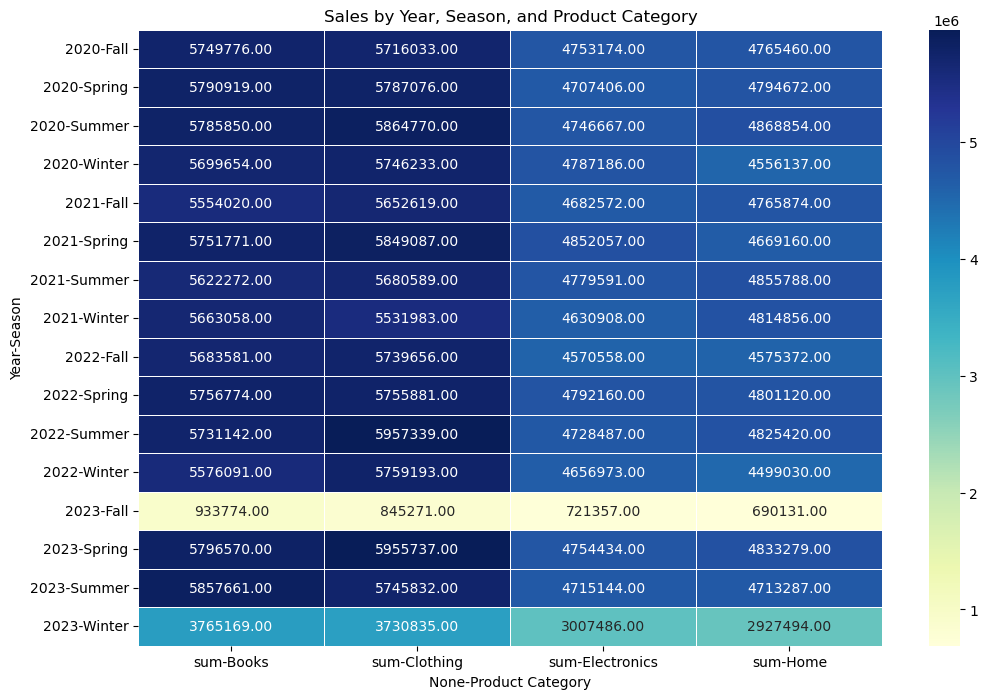

In [20]:
# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Sales by Year, Season, and Product Category')
plt.show()

In [59]:
pivot_table = df.pivot_table(index=["Season", "Time"], columns="WOW", values="Sales", aggfunc=["sum"])
pivot_table

sum         
WOW               Weekdays Weekends
Season Time                        
Fall   Afternoon  11759981  4653022
       Evening     7681848  3091910
       Morning    13725042  5487518
       Night      13458159  5541748
Spring Afternoon  15293592  5877909
       Evening    10014025  4101237
       Morning    17643419  6917851
       Night      17719354  7080716
Summer Afternoon  15306219  6007270
       Evening    10131339  3924881
       Morning    17645389  6995547
       Night      17633361  6834687
Winter Afternoon  13398462  5203005
       Evening     8824747  3526705
       Morning    15791041  6284513
       Night      16004630  6319183

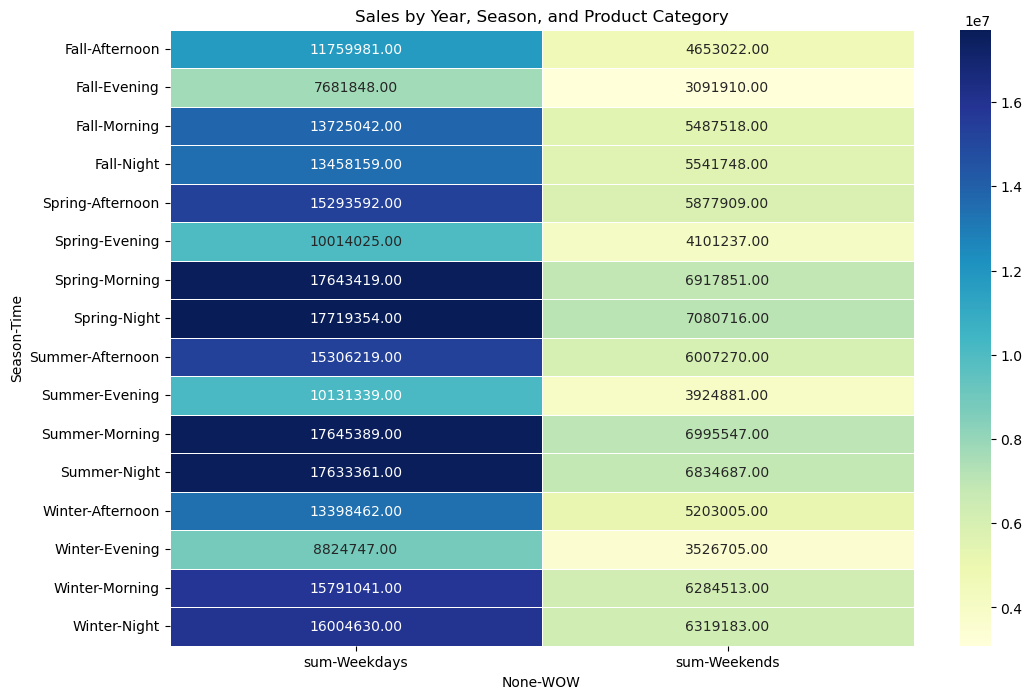

In [60]:
# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Sales by Season, Time, and WOW')
plt.show()

<font color="firebrick">**봄과 여름, 특히 평일 아침과 밤 시간대에 구매가 많이 이루어짐 -> 이 시간대에 할인 쿠폰 프로모션 진행시 효과적일 것이라고 예상**</font>

In [67]:
pivot_table = df.pivot_table(index=["Season", "Time"], columns="Product Category", values="Sales", aggfunc=["sum"])
pivot_table

sum                              
Product Category    Books Clothing Electronics     Home
Season Time                                            
Fall   Afternoon  4519745  4504264     3630333  3758661
       Evening    2962938  2947830     2497564  2365426
       Morning    5243579  5283045     4317979  4367957
       Night      5194889  5218440     4281785  4304793
Spring Afternoon  5800954  5836865     4727331  4806351
       Evening    3942962  3871920     3155536  3144844
       Morning    6597923  6835045     5510665  5617637
       Night      6754195  6803951     5712525  5529399
Summer Afternoon  5919539  5884966     4701444  4807540
       Evening    3783376  3894923     3150464  3227457
       Morning    6595835  6743114     5549394  5752593
       Night      6698175  6725527     5568587  5475759
Winter Afternoon  5183100  5065807     4179047  4173513
       Evening    3332406  3455619     2844029  2719398
       Morning    6016958  6017322     5051393  4989881
       Night      6171508  6229496     5008084  4914725

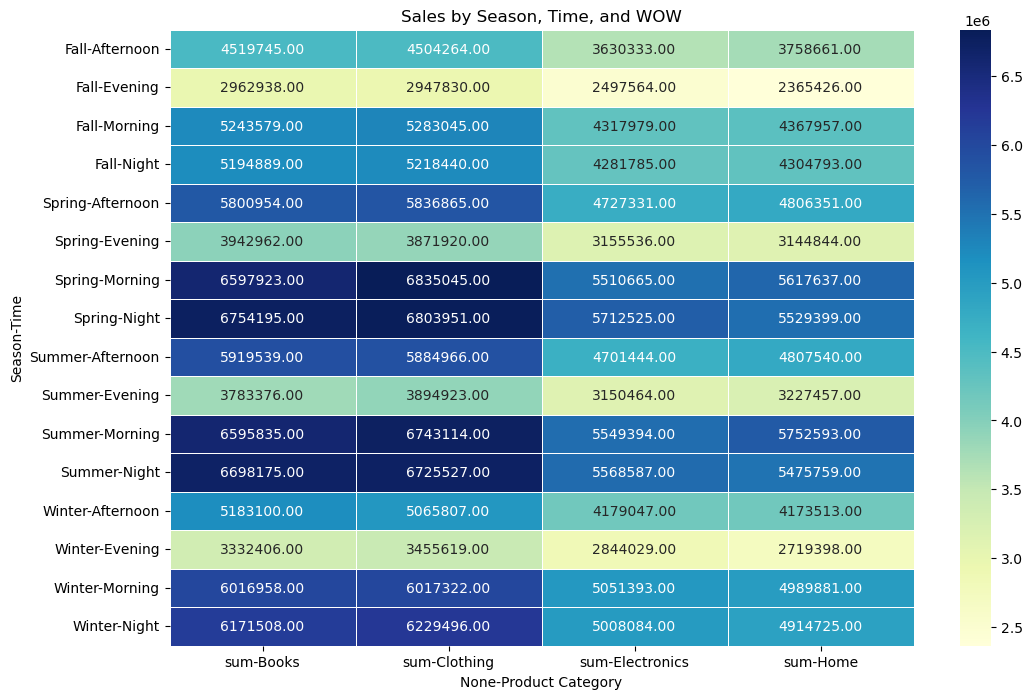

In [68]:
# 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Sales by Season, Time, and WOW')
plt.show()

<font color="firebrick">**매출액은 가을이 가장 최악**<br>
**아침=밤 > 오후 > 저녁**<br>
    **책&옷 <-> 전자제품&가정제품**</font>

* **[연속형 변수 & Sales] 상관분석**

In [21]:
df.head()

,Customer ID,Gender,Age,Age Labels,Year,Month,Day,Hour,Season,Time,DOW,WOW,Product Category,Payment Method,Sales,Returns,Churn
0,46251,Male,37,35-44,2020,9,8,9,Fall,Morning,Tuesday,Weekdays,Electronics,Credit Card,36,0.0,0
1,46251,Male,37,35-44,2022,3,5,12,Spring,Afternoon,Saturday,Weekends,Home,PayPal,1872,0.0,0
2,46251,Male,37,35-44,2022,5,23,18,Spring,Evening,Monday,Weekdays,Home,PayPal,576,0.0,0
3,46251,Male,37,35-44,2020,11,12,13,Fall,Afternoon,Thursday,Weekdays,Clothing,PayPal,196,0.0,0
4,13593,Female,49,45-54,2020,11,27,17,Fall,Afternoon,Friday,Weekdays,Home,Credit Card,449,0.0,1


In [25]:
correlation_matrix = df.corr()
sales_correlation = correlation_matrix['Sales'].sort_values(ascending=False)
sales_correlation

/var/folders/50/hmzhw8y94w90mbcy61nlrdl00000gn/T/ipykernel_41377/3476181933.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


Sales          1.000000
Returns        0.002219
Year           0.000666
Customer ID    0.000598
Age            0.000366
Month         -0.000067
Day           -0.000517
Churn         -0.000772
Hour          -0.001838
Name: Sales, dtype: float64

* **[범주형 변수 & Sales] 상관분석**

**1. ANOVA(Analysis of Variance) 수행**

In [41]:
df_A = df.rename(columns={'Age Labels':'Age_Labels', 'Product Category':'Product_Category', 'Payment Method':'Payment_Method'})

In [34]:
# Gender
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Sales ~ C(Gender)', data=df_A).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                 sum_sq        df         F    PR(>F)
C(Gender)  2.738040e+04       1.0  0.077977  0.780058
Residual   1.422163e+11  405020.0       NaN       NaN


In [42]:
# Age Labels
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('Sales ~ C(Age_Labels)', data=df_A).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                     sum_sq        df         F    PR(>F)
C(Age_Labels)  1.192672e+06       5.0  0.679325  0.639084
Residual       1.422152e+11  405016.0       NaN       NaN


In [37]:
# Season
model = ols('Sales ~ C(Season)', data=df_A).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                 sum_sq        df         F    PR(>F)
C(Season)  8.673102e+05       3.0  0.823343  0.480733
Residual   1.422155e+11  405018.0       NaN       NaN


In [36]:
# Time
model = ols('Sales ~ C(Time)', data=df_A).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                sum_sq        df         F    PR(>F)
C(Time)   1.036606e+06       3.0  0.984057  0.399059
Residual  1.422153e+11  405018.0       NaN       NaN


In [38]:
# DOW
model = ols('Sales ~ C(DOW)', data=df_A).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                sum_sq        df         F    PR(>F)
C(DOW)    3.985888e+06       6.0  1.891941  0.078101
Residual  1.422124e+11  405015.0       NaN       NaN


In [39]:
# WOW
model = ols('Sales ~ C(WOW)', data=df_A).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                sum_sq        df         F    PR(>F)
C(WOW)    8.110476e+05       1.0  2.309807  0.128561
Residual  1.422156e+11  405020.0       NaN       NaN


In [43]:
# Product Category
model = ols('Sales ~ C(Product_Category)', data=df_A).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                           sum_sq        df         F    PR(>F)
C(Product_Category)  9.047540e+05       3.0  0.858888  0.461596
Residual             1.422155e+11  405018.0       NaN       NaN


In [44]:
# Payment Method
model = ols('Sales ~ C(Payment_Method)', data=df_A).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print(anova_table)

                         sum_sq        df         F    PR(>F)
C(Payment_Method)  9.332420e+05       3.0  0.885932  0.447448
Residual           1.422154e+11  405018.0       NaN       NaN


<font color="firebrick">**Sales에 영향을 주는 컬럼 존재 X**</font>

**2. ruskal-Wallis Test 수행**

In [47]:
# Gender
from scipy.stats import kruskal

category_groups = [df_A['Sales'][df_A['Gender'] == category] for category in df_A['Gender'].unique()]
h_statistic, p_value = kruskal(*category_groups)

print(f'Kruskal-Wallis H-statistic: {h_statistic}')
print(f'p-value: {p_value}')

Kruskal-Wallis H-statistic: 0.001601132461549533
p-value: 0.9680818426560841


In [48]:
# Age Labels
from scipy.stats import kruskal

category_groups = [df_A['Sales'][df_A['Age_Labels'] == category] for category in df_A['Age_Labels'].unique()]
h_statistic, p_value = kruskal(*category_groups)

print(f'Kruskal-Wallis H-statistic: {h_statistic}')
print(f'p-value: {p_value}')

Kruskal-Wallis H-statistic: 3.818978113159035
p-value: 0.5757619675169214


In [49]:
# Season
from scipy.stats import kruskal

category_groups = [df_A['Sales'][df_A['Season'] == category] for category in df_A['Season'].unique()]
h_statistic, p_value = kruskal(*category_groups)

print(f'Kruskal-Wallis H-statistic: {h_statistic}')
print(f'p-value: {p_value}')

Kruskal-Wallis H-statistic: 3.4089050167994834
p-value: 0.33277043290518227


In [50]:
# Time
from scipy.stats import kruskal

category_groups = [df_A['Sales'][df_A['Time'] == category] for category in df_A['Time'].unique()]
h_statistic, p_value = kruskal(*category_groups)

print(f'Kruskal-Wallis H-statistic: {h_statistic}')
print(f'p-value: {p_value}')

Kruskal-Wallis H-statistic: 2.1538437660922503
p-value: 0.5410968318217051


In [51]:
# DOW
from scipy.stats import kruskal

category_groups = [df_A['Sales'][df_A['DOW'] == category] for category in df_A['DOW'].unique()]
h_statistic, p_value = kruskal(*category_groups)

print(f'Kruskal-Wallis H-statistic: {h_statistic}')
print(f'p-value: {p_value}')

Kruskal-Wallis H-statistic: 11.280448228239871
p-value: 0.08008604439561037


In [52]:
# WOW
from scipy.stats import kruskal

category_groups = [df_A['Sales'][df_A['WOW'] == category] for category in df_A['WOW'].unique()]
h_statistic, p_value = kruskal(*category_groups)

print(f'Kruskal-Wallis H-statistic: {h_statistic}')
print(f'p-value: {p_value}')

Kruskal-Wallis H-statistic: 1.5205889111334923
p-value: 0.21753039518956


In [55]:
# Product Category
from scipy.stats import kruskal

category_groups = [df_A['Sales'][df_A['Product_Category'] == category] for category in df_A['Product_Category'].unique()]
h_statistic, p_value = kruskal(*category_groups)

print(f'Kruskal-Wallis H-statistic: {h_statistic}')
print(f'p-value: {p_value}')

Kruskal-Wallis H-statistic: 2.2302389873673656
p-value: 0.5260168189505832


In [57]:
# Payment Method
from scipy.stats import kruskal

category_groups = [df_A['Sales'][df_A['Payment_Method'] == category] for category in df_A['Payment_Method'].unique()]
h_statistic, p_value = kruskal(*category_groups)

print(f'Kruskal-Wallis H-statistic: {h_statistic}')
print(f'p-value: {p_value}')

Kruskal-Wallis H-statistic: 2.9468568823250316
p-value: 0.3998915834896638


<font color="firebrick">**Sales에 영향을 주는 컬럼 존재 X**</font>

### 3. RFM 분석

In [31]:
import datetime as dt
# Purchase Date 컬럼 만들기
df['Purchase Date'] = pd.to_datetime(df[['Year','Month','Day','Hour']])
today_date = dt.datetime(2023,9,15)

In [32]:
rfm = df.groupby('Customer ID').agg({'Purchase Date': lambda Purchase_Date: (today_date - Purchase_Date.max()).days,
                                     'Customer ID': lambda Customer_ID: Customer_ID.value_counts(),
                                     'Sales': lambda Total_Purchase_Amount: Total_Purchase_Amount.sum()})
rfm.head()

,Purchase Date,Customer ID,Sales
Customer ID,,,
1,57,2,3125
2,73,8,7137
3,88,8,5155
4,442,6,4615
5,170,9,5206


In [33]:
# RFM 고객 세분화 (Monetary 속성은 제외)
rfm.columns = ['Recency', 'Frequency', 'Monetary']

rfm["recency_score"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm["frequency_score"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])
rfm["monetary_score"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

rfm["RFM_SCORE"] = (rfm['recency_score'].astype(str) +
                    rfm['frequency_score'].astype(str))

* <font color = "cornflowerblue"> **Hibernating : 겨울잠 고객, 구매 가능성이 떨어진 고객 (최근구매 C, 자주구매 C)</font>**
* <font color = "crimson">**At Risk : 위험 고객, 잃으면 위험성 있는 고객 (최근구매 C, 자주구매 B)</font>**
* <font color = "crimson">**Cant Loose : 잃을 수 없는 고객, 잃으면 손해인 고객 (최근구매 C, 자주구매 A)</font>**
* <font color = "crimson">**About to sleep : 잠자려는 고객, 구매 가능성이 떨어지려는 고객 (최근구매 B, 자주구매 C)</font>**
* <font color = "crimson">**Need Attention : 집중이 필요한 고객, 꽉 붙잡아야 하는 고객 (최근구매 B, 자주구매 B)</font>**
* <font color = "mediumseagreen">**Loyal Customer : 로얄 고객 (최근구매 B, 자주구매 A)</font>**
* <font color = "crimson">**Promising : 유망 고객 (최근구매 B, 자주구매 C)</font>**
* <font color = "crimson">**New Customers : 새 고객 (최근구매 A, 자주구매 C)</font>**
* <font color = "mediumseagreen">**Potential Loyalists : 잠재 로얄 고객 (최근구매 A, 자주구매 B)</font>**
* <font color = "mediumseagreen">**Chamions : 최우수 고객 (최근구매 A, 자주구매 A)</font>**

In [34]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At Risk',
    r'[1-2]5': 'Cant Loose',
    r'3[1-2]': 'About to sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}
rfm['segment'] = rfm['RFM_SCORE'].replace(seg_map, regex=True)
rfm

,Recency,Frequency,Monetary,recency_score,frequency_score,monetary_score,RFM_SCORE,segment
Customer ID,,,,,,,,
1,57,2,3125,4,1,1,41,Promising
2,73,8,7137,4,3,4,43,Potential Loyalists
3,88,8,5155,3,3,2,33,Need Attention
4,442,6,4615,1,1,2,11,Hibernating
5,170,9,5206,2,3,2,23,At Risk
...,...,...,...,...,...,...,...,...
49996,271,9,8827,1,4,5,14,At Risk
49997,48,9,9072,4,4,5,44,Loyal Customers
49998,14,12,9420,5,5,5,55,Champions
